분류
===

설정
--

In [160]:
#파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False # 마이너스 표시 오류 제거

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

# os.makedirs(os.path.join(PROJECT_ROOT_DIR,'images','classification'))

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = r"C:\Users\default.DESKTOP-S5Q9GAA\Documents\Programs\study_datascience\scikit_learn\handson"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

데이터 다운로드
----

In [161]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [162]:
# 70000개의 이미지, 28x28(=784)개의 특성
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)
X.shape

(70000, 784)

In [163]:
# 실제 숫자 정보를 나타내는 레이블
y.shape

(70000,)

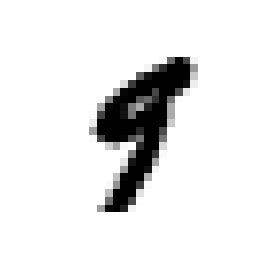

In [164]:
# 시각화해보기
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [165]:
y[36000]

9

이진 분류기
----

In [166]:
# 테스트 세트 만들기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [167]:
# 훈련 세트 섞기
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [168]:
# 이진 분류기 : 5 분류기
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [169]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
sgd_clf.predict([some_digit])

array([False])

In [171]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5, scoring = 'accuracy')

array([0.96025331, 0.95633333, 0.95716667, 0.96366667, 0.96816401])

In [172]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [173]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.909  , 0.90745, 0.9125 ])

오차 행렬
---

In [174]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52972,  1607],
       [  989,  4432]], dtype=int64)

정밀도와 재현율
----

In [176]:
# 정밀도 점수 : 양성 판별 중 진짜 양성 판독 비율
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7338963404537175

In [177]:
# 재현율 : 진짜 판별 비율 중 양성의 비율
recall_score(y_train_5, y_train_pred)

0.8175613355469471

In [178]:
# F1 점수 : 정밀도와 재현율의 조화 평균
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7734729493891798

In [179]:
# 정밀도 재현율 사이의 트레이드오프
# 임계치 확인
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-176288.21703149])

In [180]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [181]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [182]:
# 적절한 임곗값 설정방법
# 훈련 세트에 있는 모든 샘플의 점수를 구함
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                            method = 'decision_function')

In [183]:
y_scores

array([-541971.71965098, -127158.06386165, -158728.91744799, ...,
       -152650.66641685, -546154.61419768, -464504.00897079])

In [184]:
# precition_recall_curve() 함수를 사용하여 모든 임곗값에 대한 
# 정밀도와 재현율을 계산할 수 있다
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

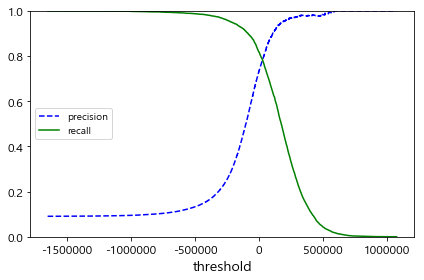

In [185]:
# 시각화하기
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'recall')
    plt.xlabel('threshold')
    plt.legend(loc = 'center left')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig('precision-recalls')
plt.show()

In [186]:
# 정밀도 90% 지정하기

y_train_pred_90 = (y_scores > 70000)

In [187]:
# 확인해보기

precision_score(y_train_5, y_train_pred_90)

0.855198572066042

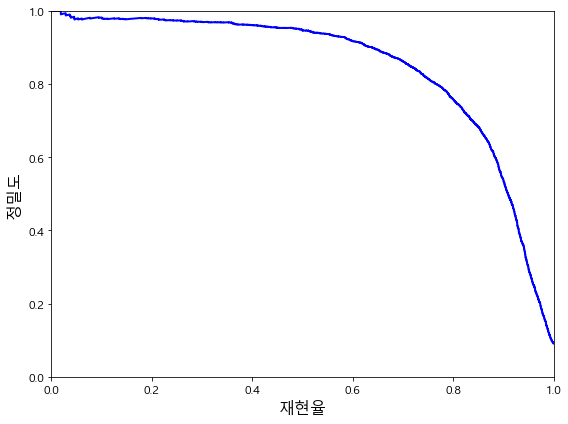

In [188]:
# 정밀도-재현율 곡선
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth = 2)
    plt.xlabel('재현율', fontsize = 16)
    plt.ylabel('정밀도', fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig('precision_vs_plot')
plt.show()

In [189]:
recall_score(y_train_5, y_train_pred_90)

0.7070651171370596

ROC 곡선
----

In [190]:
# ROC곡선
# 거짓 양성 비율(특이도)에 대한 재현율의 곡선
# 재현율 = 1 - 특이도
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

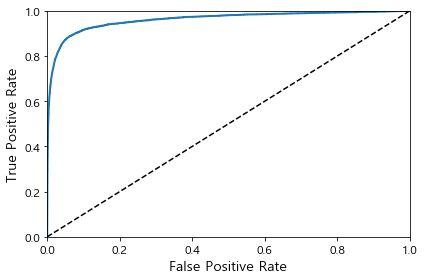

In [191]:
# 시각화
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
save_fig("TPR-FPR")
plt.show()

In [192]:
# AUC(Area under curve) 계산해보기
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9614189997126434

In [197]:
# ROC곡선과 ROC AUC 점수 비교
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                 cv = 3, method = 'predict_proba')

In [200]:
y_scores_forest = y_probas_forest[:, 1] # 점수는 양상 클래스의 확률입니다
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [203]:
y_probas_forest[:, 1]

array([0. , 0. , 0. , ..., 0. , 0.1, 0. ])

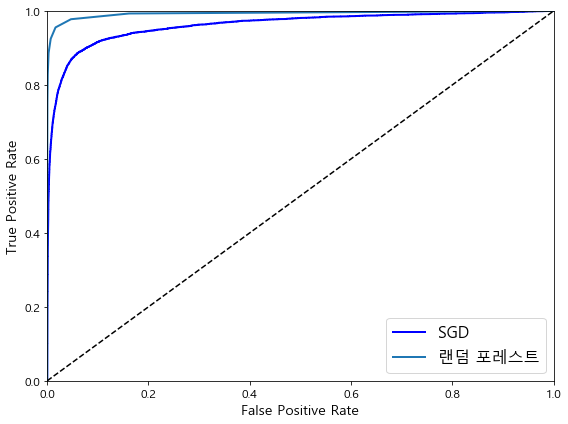

In [204]:
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, 'b', linewidth = 2, label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, '랜덤 포레스트')
plt.legend(loc = 'lower right', fontsize = 16)
save_fig('roc_curve_comparison_plot')
plt.show()

In [206]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

In [207]:
# 정밀도 점수
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [208]:
# 재현율 점수
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

다중 분류
---

In [209]:
# 0~9까지의 숫자를 모두 훈련시킴
# 5뿐만 아니라!
# 이진분류기 10개 훈련 후 점수가 가장 높은 클래스 선택
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4])

In [210]:
# 클래스마다의 점수 확인해보기
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-736165.13534356, -391182.59305387, -752094.90919363,
        -199593.6564959 ,  -33428.88555026, -176288.21703149,
        -856742.40238951, -145757.71304016, -253587.97052021,
        -249064.39096412]])

In [211]:
# 가장 점수가 높은 클래스 5개
np.argmax(some_digit_scores)

4

In [212]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [213]:
sgd_clf.classes_[5]

5

In [214]:
# OvO나 OvA 방식 강제로 사용하기
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([9])

In [215]:
# RandomForest를 훈련시키는 것도 가능
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9])

In [216]:
# 각 클래스별 확률
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [217]:
# 교차 검증으로 정확도 평가해보기
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.81908618, 0.86379319, 0.84492674])

In [218]:
# 입력 스케일 조정으로 정확도 높히기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring='accuracy')

array([0.91131774, 0.90884544, 0.90883633])

에러 분석
----

In [219]:
# 오차 행렬
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   22,    9,   11,   52,   47,    8,   39,    3],
       [   1, 6459,   54,   29,    6,   43,    6,   11,  123,   10],
       [  53,   34, 5371,   90,   80,   23,   79,   57,  157,   14],
       [  48,   37,  147, 5315,    3,  248,   36,   58,  143,   96],
       [  20,   25,   45,   10, 5338,   10,   49,   36,   87,  222],
       [  72,   40,   38,  170,   72, 4616,  108,   28,  186,   91],
       [  35,   24,   56,    1,   39,   86, 5622,    6,   49,    0],
       [  22,   20,   73,   28,   48,   12,    4, 5832,   18,  208],
       [  53,  146,   84,  152,   14,  147,   55,   27, 5037,  136],
       [  44,   33,   29,   89,  164,   39,    3,  211,   77, 5260]],
      dtype=int64)

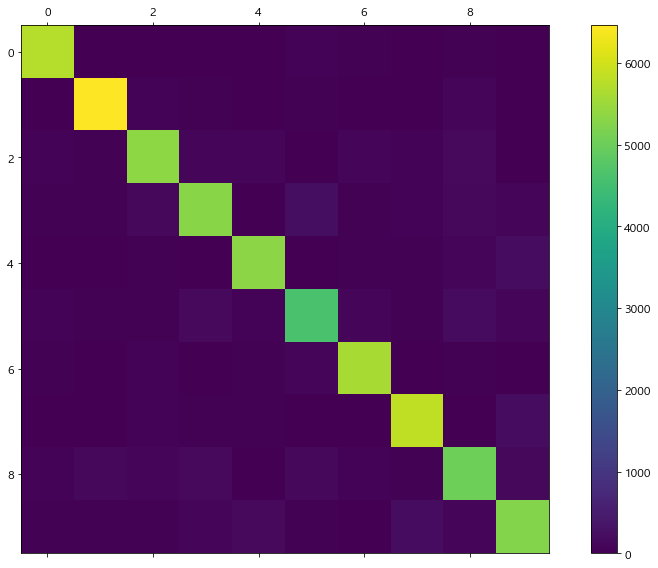

In [222]:
# 컬러 오차 행렬 원할 경우
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plot_confusion_matrix(conf_mx)
save_fig('confusion_matrix_plot_color')

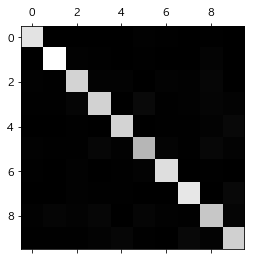

In [226]:
# 그냥 시각화
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig('confusion_matrix_plot', tight_layout = False)
plt.show()

In [227]:
# 클래스별 에러 비율 비교
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

In [228]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

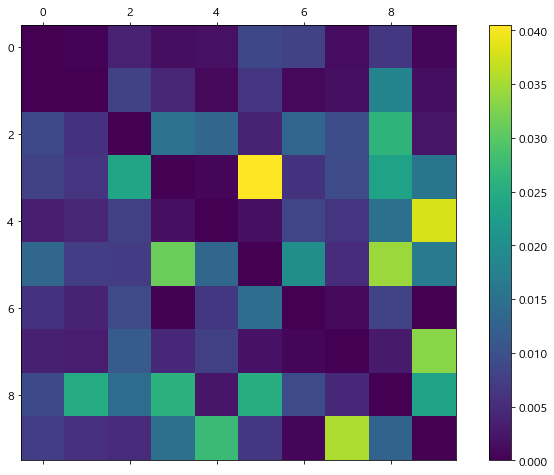

In [230]:
# 주대각선만 0으로 채워서 그래프 그리기
# 상대적으로 밝은 8과 9가 잘못 분류되었을 확률이 높다
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)
plt.show()

다중 레이블 분류
-----

In [232]:
# 여러 개의 이진 레이블을 출력하는 분류 시스템을 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [233]:
# 9가 올바르게 분류됨!
# 7 이상이고, 홀수이다
knn_clf.predict([some_digit])

array([[ True,  True]])

다중 출력 분류
-------

In [ ]:
# 픽셀 강도에 노이즈 추가
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test